# Gas Turbine Emissions - Data Visualization, K-Means Clustering

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2. Load and Summarize Data

In [2]:
# Load dataframe (df)
df = pd.read_csv('gt_2011-15.csv')
# Re-order dataframe
# Depdendent variable always on the right (standard convention)
df = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX', 
         'TEY']]

In [3]:
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  11.898   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  11.892   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  12.042   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  11.990   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...   
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  10.411   
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  10.344   
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  10.462   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  11.771   
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  11.462   

             CO      NOX     TEY  
0       0.32663   81.952  134.67  
1       0.44784   82.377  134.67  
2       0.45144   83.776  135.10  
3       0.23107   82.505  135.03  
4       0.26747   82.028  134.67  
...         ...      ...     ...  
36728  10.99300   89.172  109.08  
36729  11.14400   88.849  108.79  
36730  11.41400   96.147  107.81  
36731   3.31340   64.738  131.41  
36732  11.98100  109.240  125.41  

[36733 rows x 11 columns]

In [4]:
# Brief info about dataframe - non-null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   CDP     36733 non-null  float64
 8   CO      36733 non-null  float64
 9   NOX     36733 non-null  float64
 10  TEY     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [5]:
# Check for missing values
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

In [6]:
# Dataframe statistics on quantitative (numerical) values
df.describe()

AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           CDP            CO           NOX  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517     12.060525      2.372468     65.293067   
std       17.536373      6.842360      1.088795      2.262672     11.678357   
min     1000.800000    511.040000      9.851800      0.000388     25.905000   
25%     1071.800000    544.720000     11.435000      1.182400     57.162000   
50%     1085.900000    549.880000     11.965000      1.713500     63.849000   
75%     1097.000000    550.040000     12.855000      2.842900     71.548000   
max     1100.900000    550.610000     15.159000     44.103000    119.910000   

                TEY  
count  36733.000000  
mean     133.506404  
std       15.618634  
min      100.020000  
25%      124.450000  
50%      133.730000  
75%      144.080000  
max      179.500000

In [7]:
# Convert Pandas dataframe into a NumPy array
X = df.iloc[:, :].values

print(X.shape)

(36733, 11)


## 3. Visualize Data

#### Pairwise Relationships Between Features

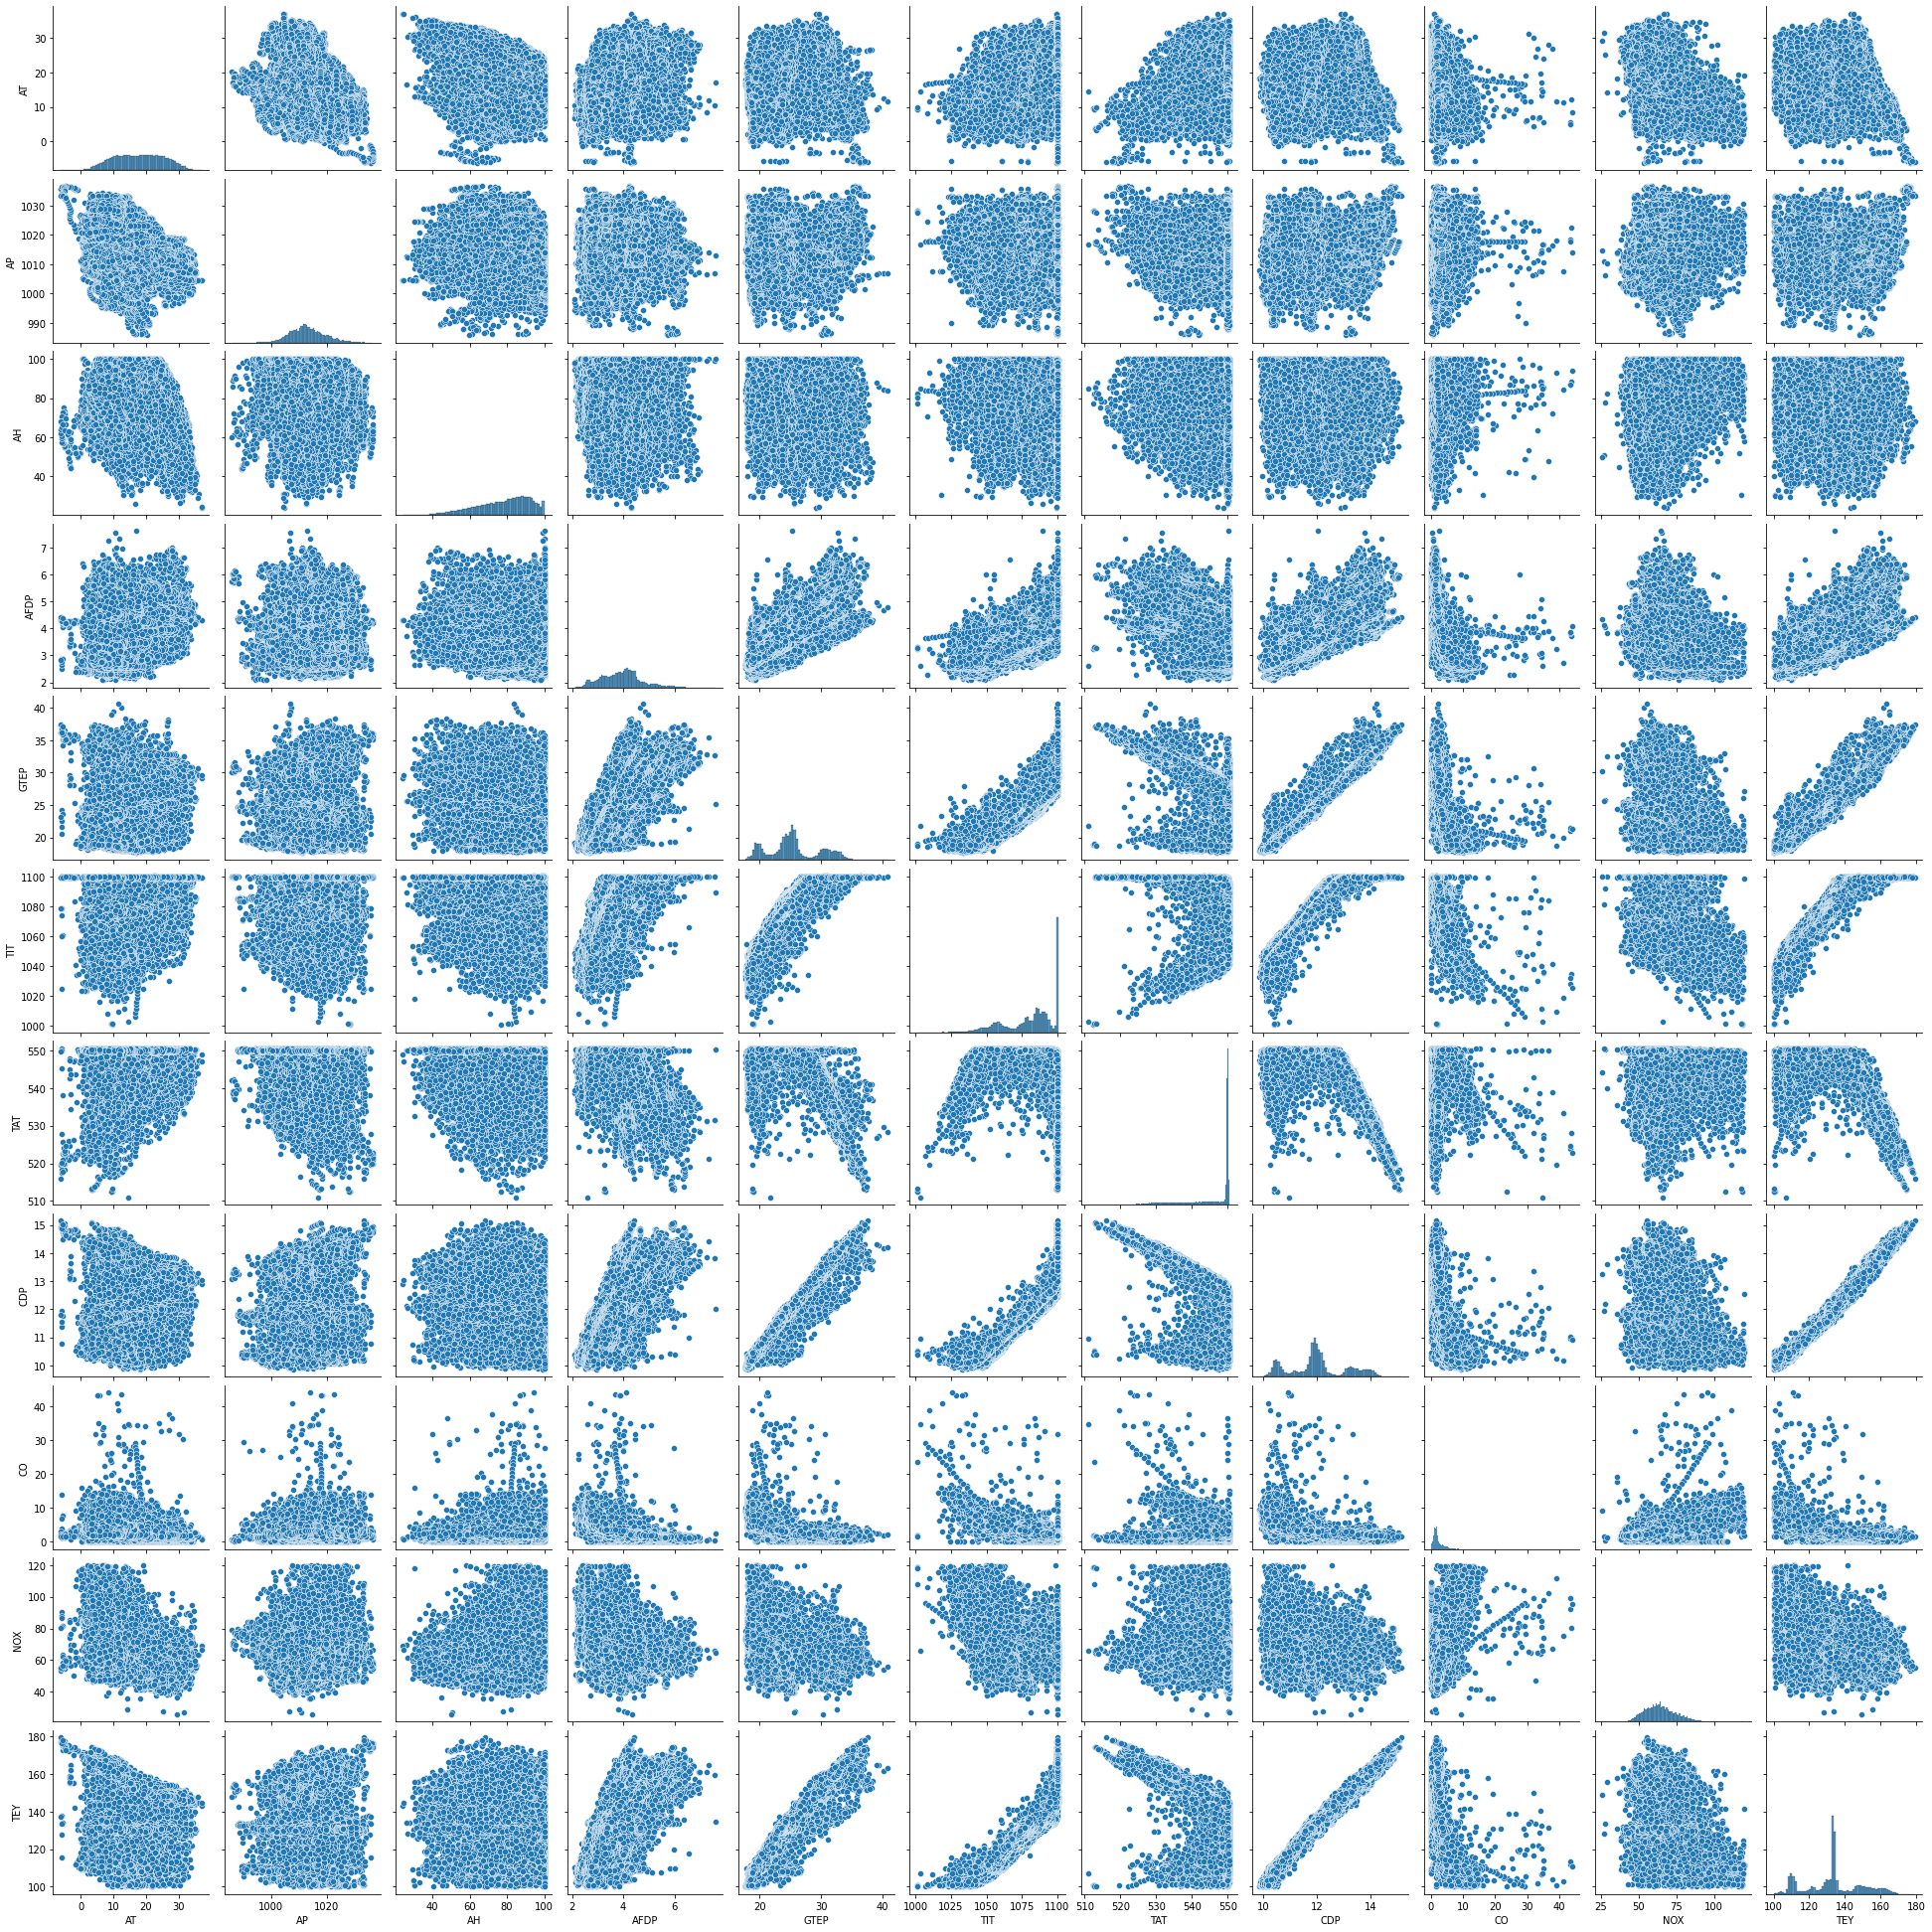

In [8]:
# Pairwise distributions
sns.pairplot(df)
# Adjust axes labels (if required)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Show figure
plt.show()

#### Correlation Map

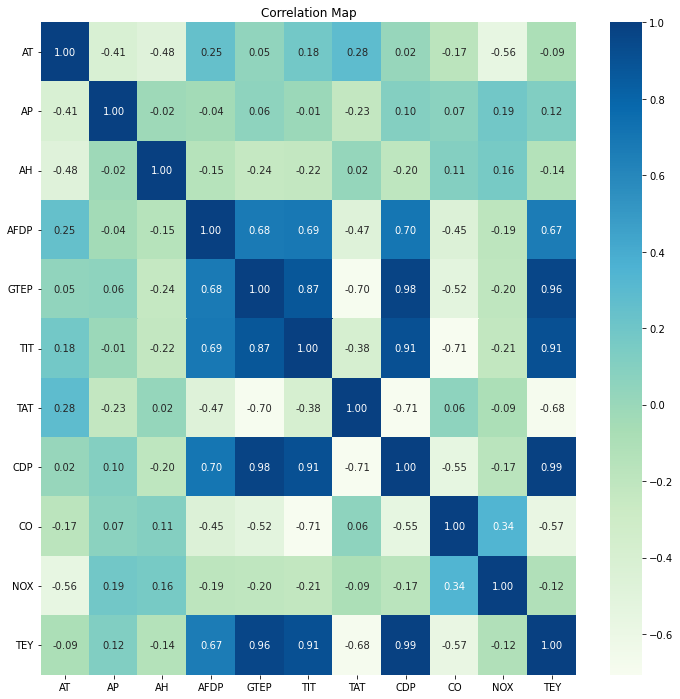

In [9]:
# Define correlation map figure
plt.figure(figsize=(12,12))

# Correlation Map
sns.heatmap(df.corr(), cmap='GnBu', annot=True, fmt = ".2f")
# Adjust axes labels (if required)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
# Figure title
plt.title('Correlation Map')

# Show figure
plt.show()

#### Ambient Temperature Distribution

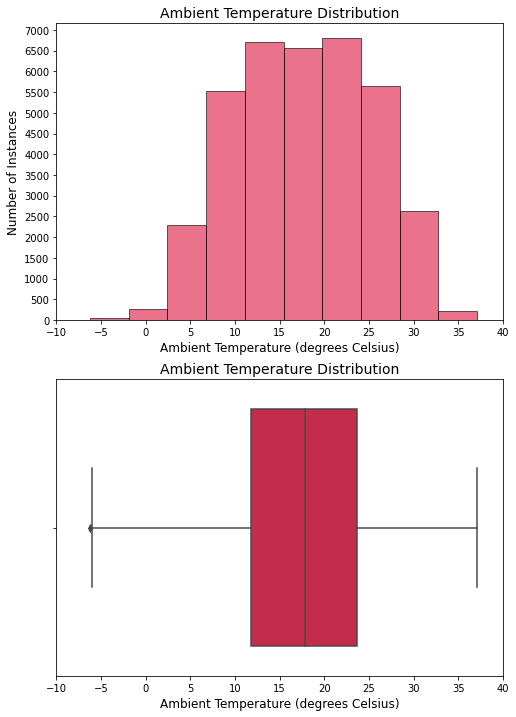

In [10]:
# Define subplot
ambient_temp = plt.figure(figsize=(8, 12))

# Histogram
ax1 = ambient_temp.add_subplot(2, 1, 1)
ax1 = plt.hist(x=df['AT'], alpha=0.6, color='crimson', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(-10, 45, 5))
plt.yticks(np.arange(0, 7500, 500))
# Plot title and labels
plt.xlabel('Ambient Temperature (degrees Celsius)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Ambient Temperature Distribution', fontsize=14)

# Box Plot
ax2 = ambient_temp.add_subplot(2, 1, 2)
ax2 = sns.boxplot(x=df['AT'], color='crimson')
# Adjust X-Axis range
plt.xticks(np.arange(-10, 45, 5))
# Plot title and X-Axis label
plt.xlabel('Ambient Temperature (degrees Celsius)', fontsize=12)
plt.title('Ambient Temperature Distribution', fontsize=14)

# Show subplot
plt.show()

#### Ambient Pressure Distribution

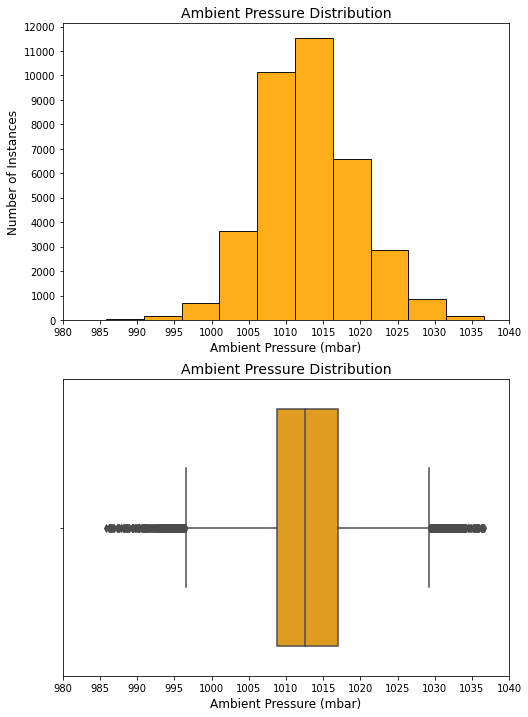

In [11]:
# Define subplot
ambient_pressure = plt.figure(figsize=(8, 12))

# Histogram
ax1 = ambient_pressure.add_subplot(2, 1, 1)
ax1 = plt.hist(x=df['AP'], alpha=0.9, color='orange', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(980, 1045, 5))
plt.yticks(np.arange(0, 13000, 1000))
# Plot title and labels
plt.xlabel('Ambient Pressure (mbar)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Ambient Pressure Distribution', fontsize=14)

# Box Plot
ax2 = ambient_pressure.add_subplot(2, 1, 2)
ax2 = sns.boxplot(x=df['AP'], color='orange')
# Adjust X-Axis range
plt.xticks(np.arange(980, 1045, 5))
# Plot title and X-Axis label
plt.xlabel('Ambient Pressure (mbar)', fontsize=12)
plt.title('Ambient Pressure Distribution', fontsize=14)

# Show plot
plt.show()

#### Ambient Temperature vs Turbine Energy Yield

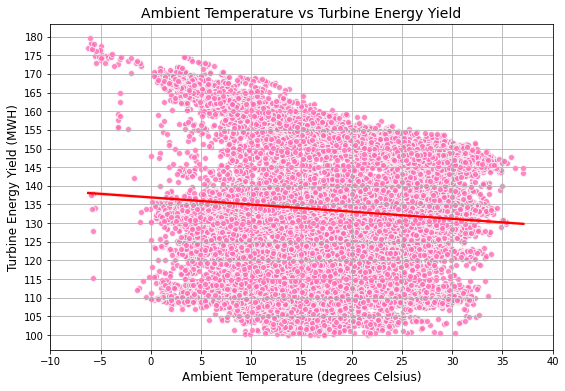

In [12]:
# Define figure
plt.figure(figsize=(9, 6))

# Scatter plot with average line of best-fit (LOBF)
sns.regplot(x=df['AT'], y=df['TEY'], order=1, 
            scatter_kws={"color": "hotpink", 'edgecolors': "whitesmoke"}, 
            line_kws={"color": "red"})
# Adjust axes ranges
plt.xticks(np.arange(-10, 45, 5))
plt.yticks(np.arange(100, 185, 5))
# Plot title and labels
plt.xlabel('Ambient Temperature (degrees Celsius)', fontsize=12)
plt.ylabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.title('Ambient Temperature vs Turbine Energy Yield', fontsize=14)
# Show grid
plt.grid()

# Show plot
plt.show()

#### Ambient Pressure vs Turbine Energy Yield

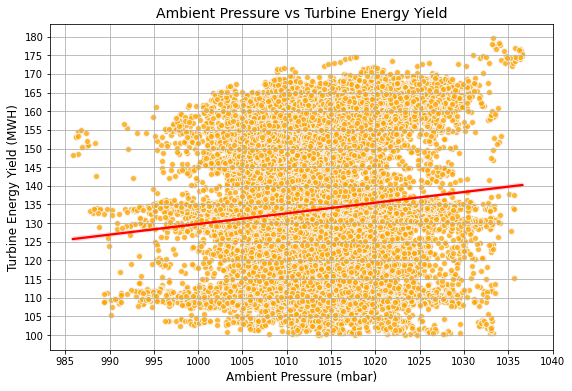

In [13]:
# Define figure
plt.figure(figsize=(9, 6))

# Scatter plot with average line of best-fit (LOBF)
sns.regplot(x=df['AP'], y=df['TEY'], order=1, 
            scatter_kws={"color": "orange", 'edgecolors': "whitesmoke"}, 
            line_kws={"color": "red"})
# Adjust axes ranges
plt.xticks(np.arange(985, 1045, 5))
plt.yticks(np.arange(100, 185, 5))
# Plot title and labels
plt.xlabel('Ambient Pressure (mbar)', fontsize=12)
plt.ylabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.title('Ambient Pressure vs Turbine Energy Yield', fontsize=14)
# Show grid
plt.grid()

# Show plot
plt.show()

#### Ambient Humidity vs Turbine Energy Yield

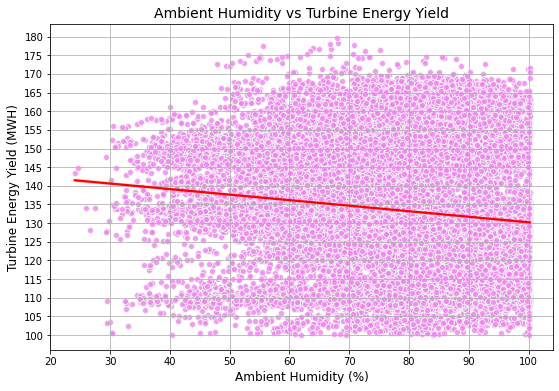

In [14]:
# Define figure
plt.figure(figsize=(9, 6))

# Scatter plot with average line of best-fit (LOBF)
sns.regplot(x=df['AH'], y=df['TEY'], order=1, 
            scatter_kws={"color": "violet", 'edgecolors': "whitesmoke"}, 
            line_kws={"color": "red"})
# Adjust axes ranges
plt.xticks(np.arange(20, 110, 10))
plt.yticks(np.arange(100, 185, 5))
# Plot title and labels
plt.xlabel('Ambient Humidity (%)', fontsize=12)
plt.ylabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.title('Ambient Humidity vs Turbine Energy Yield', fontsize=14)
# Show grid
plt.grid()

# Show plot
plt.show()

#### Ambient Temperature vs. Ambient Pressure

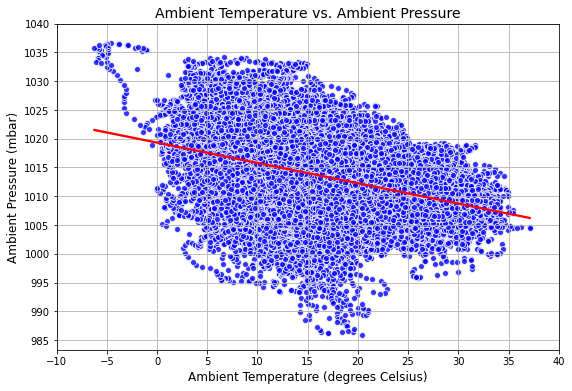

In [15]:
# Define figure
plt.figure(figsize=(9, 6))

# Scatter plot with average line of best-fit (LOBF)
sns.regplot(x=df['AT'], y=df['AP'], order=1, 
            scatter_kws={"color": "blue", 'edgecolors': "whitesmoke"}, 
            line_kws={"color": "red"})
# Adjust axes ranges
plt.xticks(np.arange(-10, 45, 5))
plt.yticks(np.arange(985, 1045, 5))
# Plot title and labels
plt.xlabel('Ambient Temperature (degrees Celsius)', fontsize=12)
plt.ylabel('Ambient Pressure (mbar)', fontsize=12)
plt.title('Ambient Temperature vs. Ambient Pressure', fontsize=14)
# Show grid
plt.grid()

# Show plot
plt.show()

#### Turbine Energy Yield Distribution (dependent variable)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


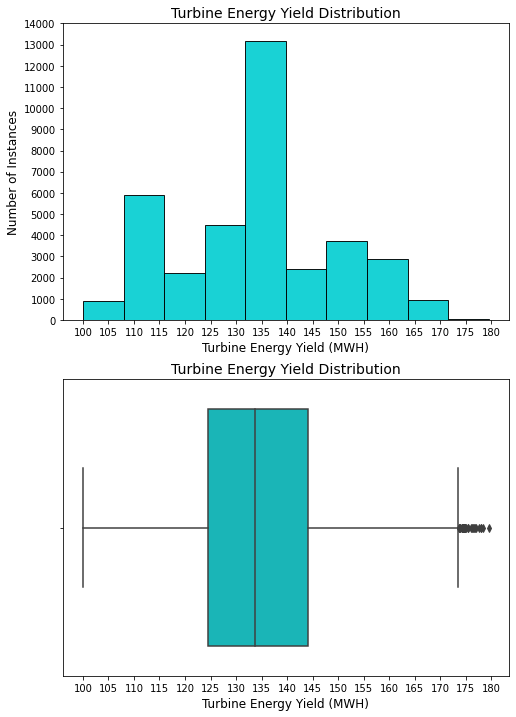

In [16]:
# Define subplot
tey = plt.figure(figsize=(8, 12))

# Histogram
ax1 = tey.add_subplot(2, 1, 1)
ax1 = plt.hist(x=df['TEY'], alpha=0.9, color='darkturquoise', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(100, 185, 5))
plt.yticks(np.arange(0, 15000, 1000))
# Plot title and labels
plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Turbine Energy Yield Distribution', fontsize=14)

# Box Plot
ax2 = tey.add_subplot(2, 1, 2)
ax2 = sns.boxplot(df['TEY'], color='darkturquoise')
# Adjust X-Axis range
plt.xticks(np.arange(100, 185, 5))
# Plot title and X-Axis label
plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.title('Turbine Energy Yield Distribution', fontsize=14)

# Show subplot
plt.show()

#### Compressor Discharge Pressure vs Turbine Energy Yield

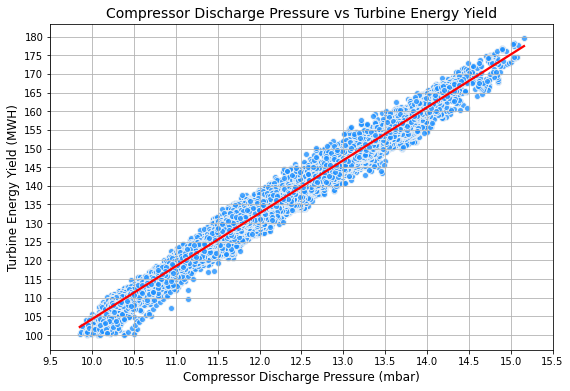

In [17]:
# Define figure
plt.figure(figsize=(9, 6))

# Scatter plot with average line of best-fit (LOBF)
sns.regplot(x=df['CDP'], y=df['TEY'], order=1, 
            scatter_kws={"color": "dodgerblue", 'edgecolors': "whitesmoke"}, 
            line_kws={"color": "red"})
# Adjust axes ranges
plt.xticks(np.arange(9.5, 16, .5))
plt.yticks(np.arange(100, 185, 5))
# Plot title and labels
plt.xlabel('Compressor Discharge Pressure (mbar)', fontsize=12)
plt.ylabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.title('Compressor Discharge Pressure vs Turbine Energy Yield', fontsize=14)
# Show grid
plt.grid()

# Show plot
plt.show()

#### Turbine Energy Yield vs. Carbon Monoxide

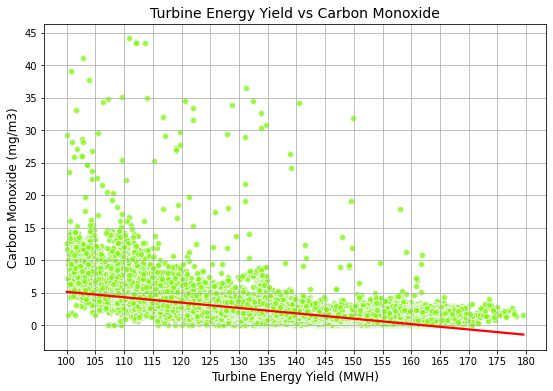

In [18]:
# Define figure
plt.figure(figsize=(9, 6))

# Scatter plot with average line of best-fit (LOBF)
sns.regplot(x=df['TEY'], y=df['CO'], order=1, 
            scatter_kws={"color": "lawngreen", 'edgecolors': "whitesmoke"}, 
            line_kws={"color": "red"})
# Adjust axes ranges
plt.xticks(np.arange(100, 185, 5))
plt.yticks(np.arange(0, 50, 5))
# Plot title and labels
plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.ylabel('Carbon Monoxide (mg/m3)', fontsize=12)
plt.title('Turbine Energy Yield vs Carbon Monoxide', fontsize=14)
# Show grid
plt.grid()

# Show plot
plt.show()

#### Turbine Energy Yield vs. Nitrogen Oxides

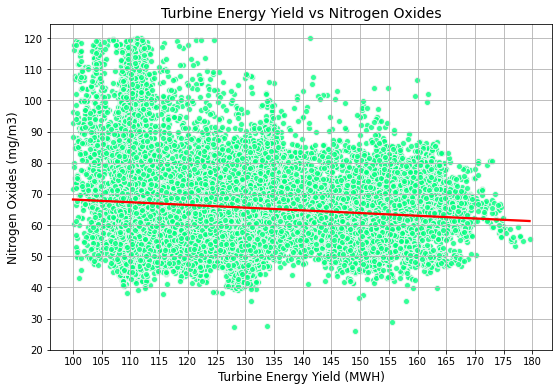

In [19]:
# Define figure
plt.figure(figsize=(9, 6))

# Scatter plot with average line of best-fit (LOBF)
sns.regplot(x=df['TEY'], y=df['NOX'], order=1, 
            scatter_kws={"color": "springgreen", 'edgecolors': "whitesmoke"}, 
            line_kws={"color": "red"})
# Adjust axes ranges
plt.xticks(np.arange(100, 185, 5))
plt.yticks(np.arange(20, 130, 10))
# Plot title and labels
plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.ylabel('Nitrogen Oxides (mg/m3)', fontsize=12)
plt.title('Turbine Energy Yield vs Nitrogen Oxides', fontsize=14)
# Show grid
plt.grid()

# Show plot
plt.show()

## 4. Apply K-Means Clustering

### 4.1 Find the optimal number of clusters

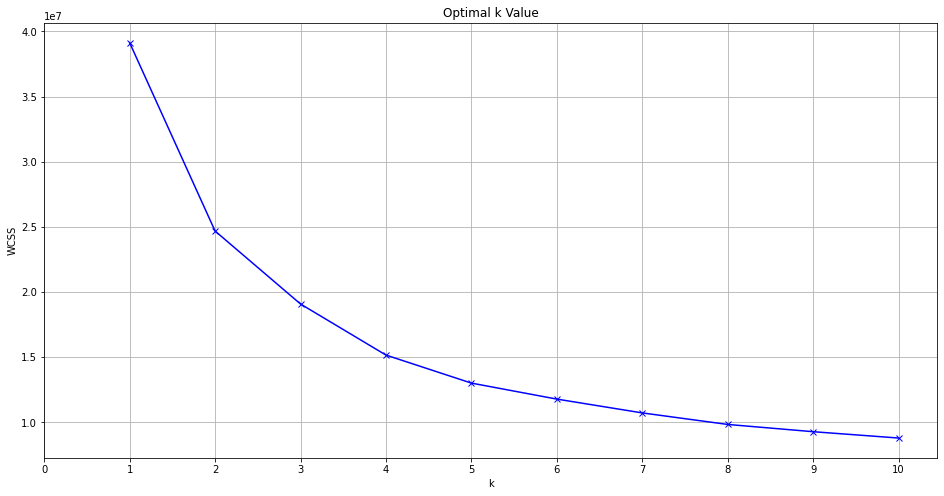

In [20]:
from sklearn.cluster import KMeans

# Using the "Elbow Method" - WCSS
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# Define figure
optimal_k = plt.figure(figsize=(16,8))
# Plot results
optimal_k = plt.plot(range(1, 11), wcss, 'bx-')
# Adjust X-Axis range
plt.xticks(np.arange(0, 11, 1))
# Plot title and labels
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Optimal k Value')
# Show grid
plt.grid()

# Show plot
plt.show()

## 5. Define Model

### K-Means

In [21]:
# Define K-Means model
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
# Train K-Means model
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

[2 2 2 ... 1 2 2]


In [22]:
print(kmeans.inertia_)          # K-Means inertia
print(kmeans.cluster_centers_)  # Centroids of each cluster
print(kmeans.n_iter_)           # Number of iterations

15159210.586086433
[[  13.81265926 1015.16344822   80.59417279    4.69680741   31.96847506
  1099.70076254  534.12966601   13.73947369    1.20889668   64.23324264
   157.22316608]
 [  16.54850577 1012.9377284    81.90138246    3.18675787   20.24742702
  1053.98179884  548.34759012   10.6111272     4.90892397   68.03251495
   111.99157546]
 [  15.34343632 1013.29798538   85.80416802    3.80560336   24.64710595
  1083.30837078  549.79216848   11.89296382    1.82545418   66.75150872
   132.73359966]
 [  25.46134217 1011.25370021   59.67185768    4.24786294   27.31335791
  1091.64503843  547.63128931   12.46285488    1.59799057   61.17274645
   137.77757629]]
10


## 6. Visualize Results

#### **Colours for each cluster:**

- **Cluster 1** - Red
- **Cluster 2** - Blue
- **Cluster 3** - Green
- **Cluster 4** - Magenta

#### Ambient Temperature vs Turbine Energy Yield

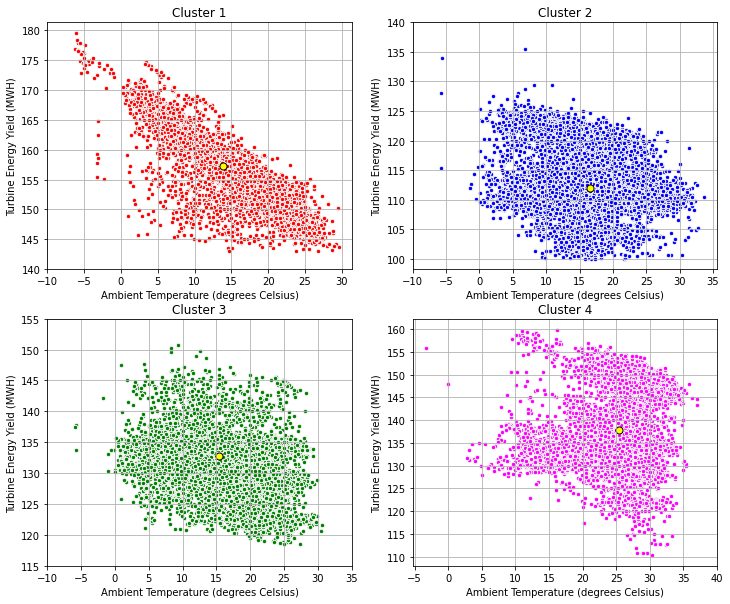

In [23]:
# Define subplot
fig1_1 = plt.figure(figsize=(12, 10))

# Cluster 1
ax1 = fig1_1.add_subplot(2, 2, 1)
ax1 = plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
# Cluster 1 centroid
ax1 = plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(-10, 35, 5))
plt.yticks(np.arange(140, 185, 5))
# Plot title and labels
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 1')
# Show grid
plt.grid()

# Cluster 2
ax2 = fig1_1.add_subplot(2, 2, 2)
ax2 = plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
# Cluster 2 centroid
ax2 = plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(-10, 40, 5))
plt.yticks(np.arange(100, 145, 5))
# Plot title and labels
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 2')
# Show grid
plt.grid()

# Cluster 3
ax3 = fig1_1.add_subplot(2, 2, 3)
ax3 = plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 4', edgecolor='whitesmoke')
# Cluster 3 centroid
ax3 = plt.scatter(kmeans.cluster_centers_[2, 0], kmeans.cluster_centers_[2, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(-10, 40, 5))
plt.yticks(np.arange(115, 160, 5))
# Plot title and labels
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 3')
# Show grid
plt.grid()

# Cluster 4
ax4 = fig1_1.add_subplot(2, 2, 4)
ax4 = plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
# Cluster 4 centroid
ax4 = plt.scatter(kmeans.cluster_centers_[3, 0], kmeans.cluster_centers_[3, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(-5, 45, 5))
plt.yticks(np.arange(110, 165, 5))
# Plot title and labels
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 4')
# Show grid
plt.grid()

# Show subplot
plt.show()

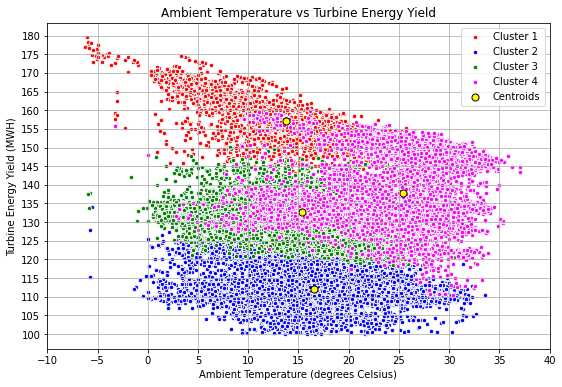

In [24]:
# Define figure
fig1_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig1_2 = plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
fig1_2 = plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
fig1_2 = plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
fig1_2 = plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')

# Plot centroids
fig1_2 = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust axes ranges
plt.xticks(np.arange(-10, 45, 5))
plt.yticks(np.arange(100, 185, 5))
# Plot title and labels
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Ambient Temperature vs Turbine Energy Yield')
# Legend and grid
plt.legend()
plt.grid()

# Show plot
plt.show()

- **Cluster 1:** Highest TEY
- **Cluster 2:** Lowest TEY 
- **Cluster 3:** Moderate TEY, but at lower temperatures
- **Cluster 4:** Moderate TEY, but at higher temperatures

#### Ambient Pressure vs Turbine Energy Yield

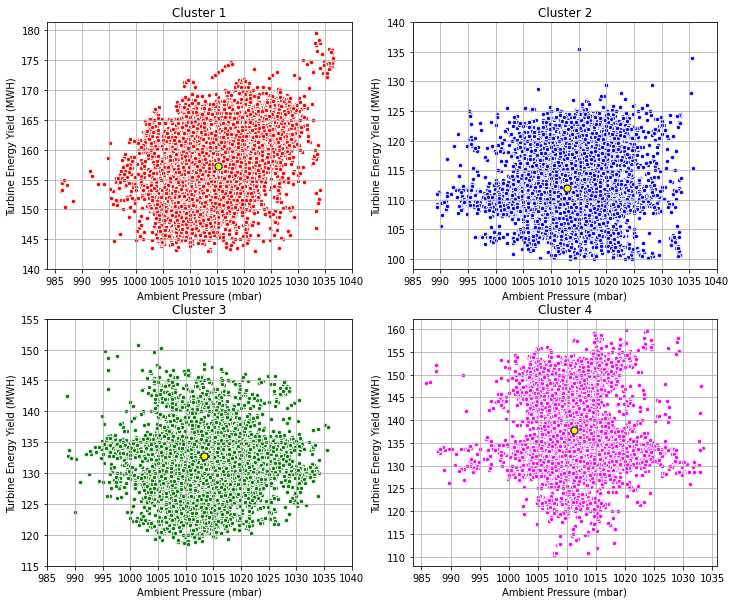

In [25]:
# Define subplot
fig2_1 = plt.figure(figsize=(12, 10))

# Cluster 1
ax1 = fig2_1.add_subplot(2, 2, 1)
ax1 = plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
# Cluster 1 centroid
ax1 = plt.scatter(kmeans.cluster_centers_[0, 1], kmeans.cluster_centers_[0, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(985, 1045, 5))
plt.yticks(np.arange(140, 185, 5))
# Plot title and labels
plt.xlabel('Ambient Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 1')
# Show grid
plt.grid()

# Cluster 2
ax2 = fig2_1.add_subplot(2, 2, 2)
ax2 = plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
# Cluster 2 centroid
ax2 = plt.scatter(kmeans.cluster_centers_[1, 1], kmeans.cluster_centers_[1, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(985, 1045, 5))
plt.yticks(np.arange(100, 145, 5))
# Plot title and labels
plt.xlabel('Ambient Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 2')
# Show grid
plt.grid()

# Cluster 3
ax3 = fig2_1.add_subplot(2, 2, 3)
ax3 = plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 4', edgecolor='whitesmoke')
# Cluster 3 centroid
ax3 = plt.scatter(kmeans.cluster_centers_[2, 1], kmeans.cluster_centers_[2, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(985, 1045, 5))
plt.yticks(np.arange(115, 160, 5))
# Plot title and labels
plt.xlabel('Ambient Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 3')
# Show grid
plt.grid()

# Cluster 4
ax4 = fig2_1.add_subplot(2, 2, 4)
ax4 = plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
# Cluster 4 centroid
ax4 = plt.scatter(kmeans.cluster_centers_[3, 1], kmeans.cluster_centers_[3, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(985, 1040, 5))
plt.yticks(np.arange(110, 165, 5))
# Plot title and labels
plt.xlabel('Ambient Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 4')
# Show grid
plt.grid()

# Show subplot
plt.show()

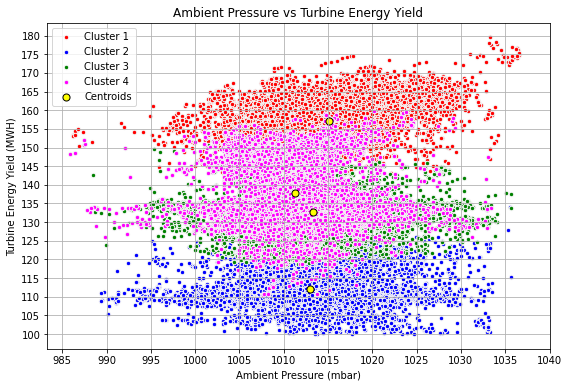

In [26]:
# Define figure
fig2_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig2_2 = plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
fig2_2 = plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
fig2_2 = plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
fig2_2 = plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')

# Plot centroids
fig2_2 = plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust axes ranges
plt.xticks(np.arange(985, 1045, 5))
plt.yticks(np.arange(100, 185, 5))
# Plot title and labels
plt.xlabel('Ambient Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Ambient Pressure vs Turbine Energy Yield')
# Legend and grid
plt.legend()
plt.grid()

# Show plot
plt.show()

- **Cluster 1:** Highest TEY
- **Cluster 2:** Lowest TEY 
- **Cluster 3:** Moderate TEY, slightly lower than Cluster 4 and at slightly higher pressure levels
- **Cluster 4:** Moderate TEY, slightly higher than Cluster 3 and at varying pressure levels

#### Ambient Temperature vs Ambient Pressure

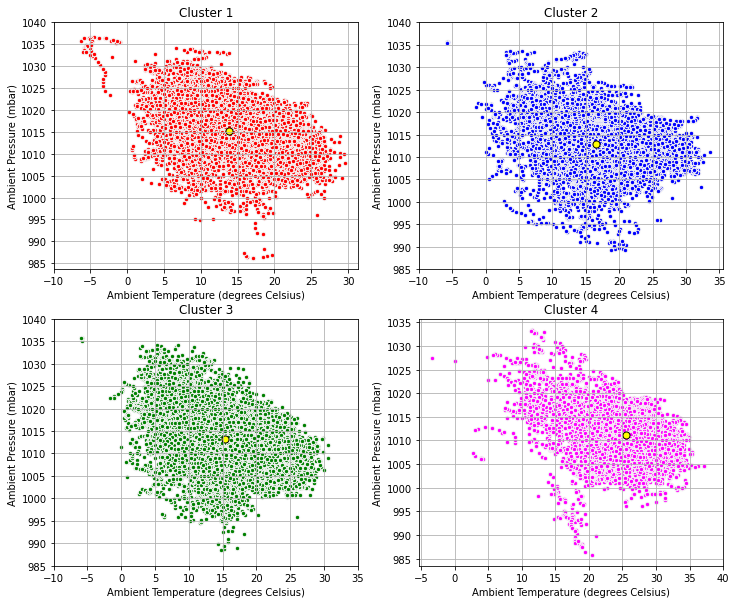

In [27]:
# Define subplot
fig3_1 = plt.figure(figsize=(12, 10))

# Cluster 1
ax1 = fig3_1.add_subplot(2, 2, 1)
ax1 = plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
# Cluster 1 centroid
ax1 = plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(-10, 35, 5))
plt.yticks(np.arange(985, 1045, 5))
# Plot title and labels
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Ambient Pressure (mbar)')
plt.title('Cluster 1')
# Show grid
plt.grid()

# Cluster 2
ax2 = fig3_1.add_subplot(2, 2, 2)
ax2 = plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
# Cluster 2 centroid
ax2 = plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(-10, 40, 5))
plt.yticks(np.arange(985, 1045, 5))
# Plot title and labels
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Ambient Pressure (mbar)')
plt.title('Cluster 2')
# Show grid
plt.grid()

# Cluster 3
ax3 = fig3_1.add_subplot(2, 2, 3)
ax3 = plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=20, c='green', 
            label='Cluster 4', edgecolor='whitesmoke')
# Cluster 3 centroid
ax3 = plt.scatter(kmeans.cluster_centers_[2, 0], kmeans.cluster_centers_[2, 1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(-10, 40, 5))
plt.yticks(np.arange(985, 1045, 5))
# Plot title and labels
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Ambient Pressure (mbar)')
plt.title('Cluster 3')
# Show grid
plt.grid()

# Cluster 4
ax4 = fig3_1.add_subplot(2, 2, 4)
ax4 = plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
# Cluster 4 centroid
ax4 = plt.scatter(kmeans.cluster_centers_[3, 0], kmeans.cluster_centers_[3, 1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(-5, 45, 5))
plt.yticks(np.arange(985, 1040, 5))
# Plot title and labels
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Ambient Pressure (mbar)')
plt.title('Cluster 4')
# Show grid
plt.grid()

# Show subplot
plt.show()

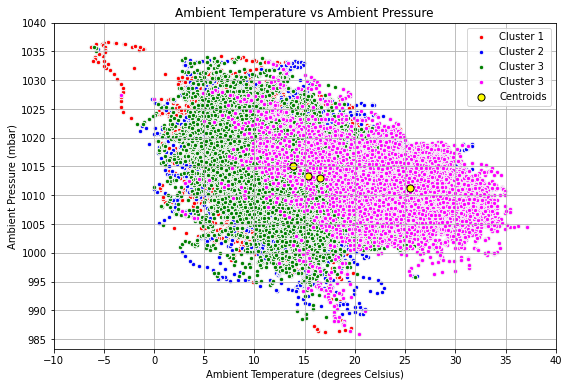

In [28]:
# Define figure
fig3_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig3_2 = plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
fig3_2 = plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
fig3_2 = plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
fig3_2 = plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=20, c='magenta', 
            label='Cluster 3', edgecolor='whitesmoke')

# Plot centroids
fig3_2 = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust axes ranges
plt.xticks(np.arange(-10, 45, 5))
plt.yticks(np.arange(985, 1045, 5))
# Plot title and labels
plt.xlabel('Ambient Temperature (degrees Celsius)')
plt.ylabel('Ambient Pressure (mbar)')
plt.title('Ambient Temperature vs Ambient Pressure')
# Legend and grid
plt.legend()
plt.grid()

# Show plot
plt.show()

- **Cluster 1:** Most outliers at higher pressure, but lower temperature
- **Cluster 2:** Average temperature and pressure, but more outliers at lower pressure
- **Cluster 3:** Average temperature and pressure
- **Cluster 4:** Highest temperatures, a few outliers at lower pressure

#### Ambient Humidity vs Turbine Energy Yield

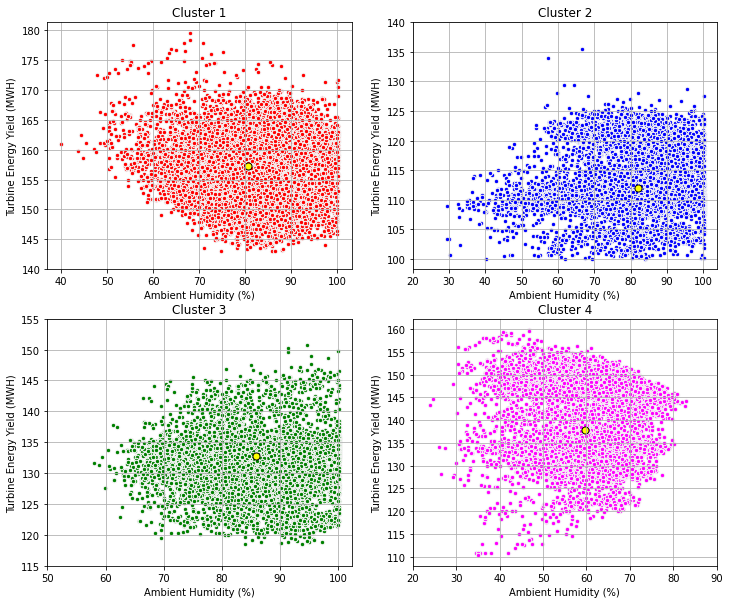

In [29]:
# Define subplot
fig4_1 = plt.figure(figsize=(12, 10))

# Cluster 1
ax1 = fig4_1.add_subplot(2, 2, 1)
ax1 = plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
# Cluster 1 centroid
ax1 = plt.scatter(kmeans.cluster_centers_[0, 2], kmeans.cluster_centers_[0, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(40, 110, 10))
plt.yticks(np.arange(140, 185, 5))
# Plot title and labels
plt.xlabel('Ambient Humidity (%)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 1')
# Show grid
plt.grid()

# Cluster 2
ax2 = fig4_1.add_subplot(2, 2, 2)
ax2 = plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
# Cluster 2 centroid
ax2 = plt.scatter(kmeans.cluster_centers_[1, 2], kmeans.cluster_centers_[1, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(20, 110, 10))
plt.yticks(np.arange(100, 145, 5))
# Plot title and labels
plt.xlabel('Ambient Humidity (%)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 2')
# Show grid
plt.grid()

# Cluster 3
ax3 = fig4_1.add_subplot(2, 2, 3)
ax3 = plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 4', edgecolor='whitesmoke')
# Cluster 3 centroid
ax3 = plt.scatter(kmeans.cluster_centers_[2, 2], kmeans.cluster_centers_[2, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(50, 110, 10))
plt.yticks(np.arange(115, 160, 5))
# Plot title and labels
plt.xlabel('Ambient Humidity (%)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 3')
# Show grid
plt.grid()

# Cluster 4
ax4 = fig4_1.add_subplot(2, 2, 4)
ax4 = plt.scatter(X[y_kmeans == 3, 2], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
# Cluster 4 centroid
ax4 = plt.scatter(kmeans.cluster_centers_[3, 2], kmeans.cluster_centers_[3, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(20, 100, 10))
plt.yticks(np.arange(110, 165, 5))
# Plot title and labels
plt.xlabel('Ambient Humidity (%)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 4')
# Show grid
plt.grid()

# Show subplot
plt.show()

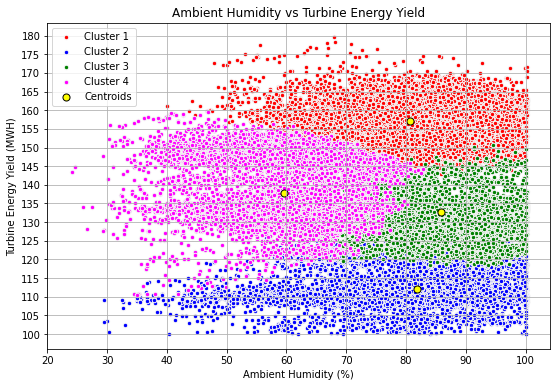

In [30]:
# Define figure
fig4_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig4_2 = plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
fig4_2 = plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
fig4_2 = plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
fig4_2 = plt.scatter(X[y_kmeans == 3, 2], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')

# Plot centroids
fig4_2 = plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust axes ranges
plt.xticks(np.arange(20, 110, 10))
plt.yticks(np.arange(100, 185, 5))
# Plot title and labels
plt.xlabel('Ambient Humidity (%)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Ambient Humidity vs Turbine Energy Yield')
# Legend and grid
plt.legend()
plt.grid()

# Show plot
plt.show()

- **Cluster 1:** Highest TEY, varying humidity
- **Cluster 2:** Lowest TEY, varying humidity
- **Cluster 3:** Moderate TEY, above average humidity
- **Cluster 4:** Moderate TEY, below average humidity

#### Compressor Discharge Pressure vs Turbine Energy Yield

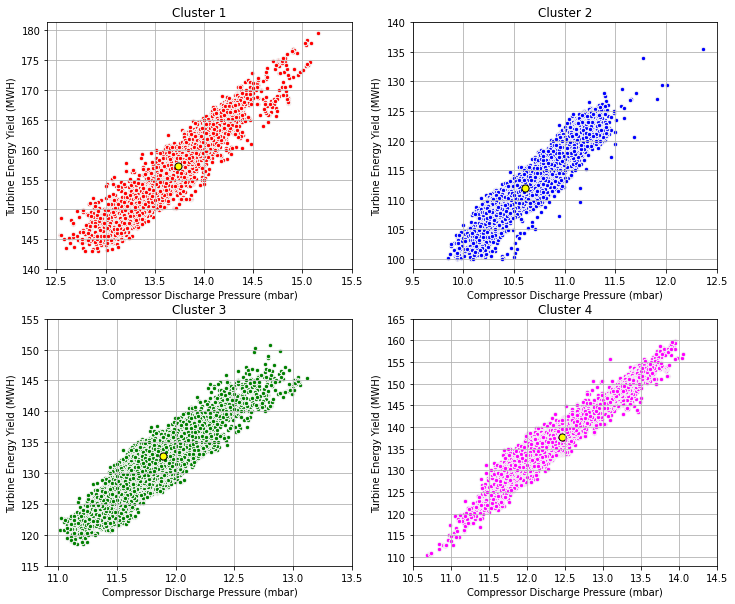

In [31]:
# Define subplot
fig5_1 = plt.figure(figsize=(12, 10))

# Cluster 1
ax1 = fig5_1.add_subplot(2, 2, 1)
ax1 = plt.scatter(X[y_kmeans == 0, 7], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
# Cluster 1 centroid
ax1 = plt.scatter(kmeans.cluster_centers_[0, 7], kmeans.cluster_centers_[0, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(12.5, 16, .5))
plt.yticks(np.arange(140, 185, 5))
# Plot title and labels
plt.xlabel('Compressor Discharge Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 1')
# Show grid
plt.grid()

# Cluster 2
ax2 = fig5_1.add_subplot(2, 2, 2)
ax2 = plt.scatter(X[y_kmeans == 1, 7], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
# Cluster 2 centroid
ax2 = plt.scatter(kmeans.cluster_centers_[1, 7], kmeans.cluster_centers_[1, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(9.5, 13, .5))
plt.yticks(np.arange(100, 145, 5))
# Plot title and labels
plt.xlabel('Compressor Discharge Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 2')
# Show grid
plt.grid()

# Cluster 3
ax3 = fig5_1.add_subplot(2, 2, 3)
ax3 = plt.scatter(X[y_kmeans == 2, 7], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 4', edgecolor='whitesmoke')
# Cluster 3 centroid
ax3 = plt.scatter(kmeans.cluster_centers_[2, 7], kmeans.cluster_centers_[2, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(11, 14, .5))
plt.yticks(np.arange(115, 160, 5))
# Plot title and labels
plt.xlabel('Compressor Discharge Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 3')
# Show grid
plt.grid()

# Cluster 4
ax4 = fig5_1.add_subplot(2, 2, 4)
ax4 = plt.scatter(X[y_kmeans == 3, 7], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
# Cluster 4 centroid
ax4 = plt.scatter(kmeans.cluster_centers_[3, 7], kmeans.cluster_centers_[3, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(10.5, 15, .5))
plt.yticks(np.arange(110, 170, 5))
# Plot title and labels
plt.xlabel('Compressor Discharge Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Cluster 4')
# Show grid
plt.grid()

# Show subplot
plt.show()

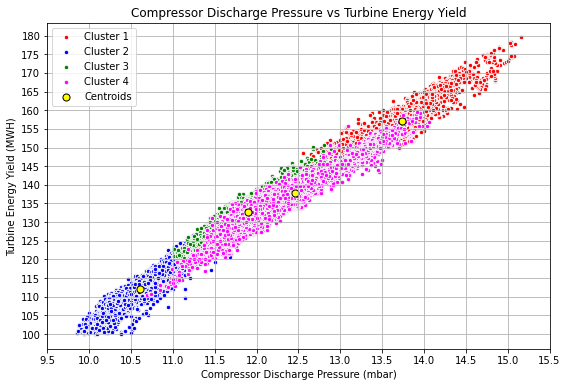

In [32]:
# Define figure
fig5_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig5_2 = plt.scatter(X[y_kmeans == 0, 7], X[y_kmeans == 0, -1], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
fig5_2 = plt.scatter(X[y_kmeans == 1, 7], X[y_kmeans == 1, -1], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
fig5_2 = plt.scatter(X[y_kmeans == 2, 7], X[y_kmeans == 2, -1], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
fig5_2 = plt.scatter(X[y_kmeans == 3, 7], X[y_kmeans == 3, -1], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
# Plot centroids
fig5_2 = plt.scatter(kmeans.cluster_centers_[:, 7], kmeans.cluster_centers_[:, -1], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust axes ranges
plt.xticks(np.arange(9.5, 16, .5))
plt.yticks(np.arange(100, 185, 5))
# Plot title and labels
plt.xlabel('Compressor Discharge Pressure (mbar)')
plt.ylabel('Turbine Energy Yield (MWH)')
plt.title('Compressor Discharge Pressure vs Turbine Energy Yield')
# Legend and grid
plt.legend()
plt.grid()

# Show plot
plt.show()

- **Cluster 1:** Higher CDP, higher TEY
- **Cluster 2:** Lower CDP, lower TEY
- **Cluster 3:** Moderate CDP (slightly lower than Cluster 4), slightly lower TEY
- **Cluster 4:** Moderate CDP (slightly higher than Cluster 3), slightly higher TEY

#### Turbine Energy Yield vs Carbon Monoxide

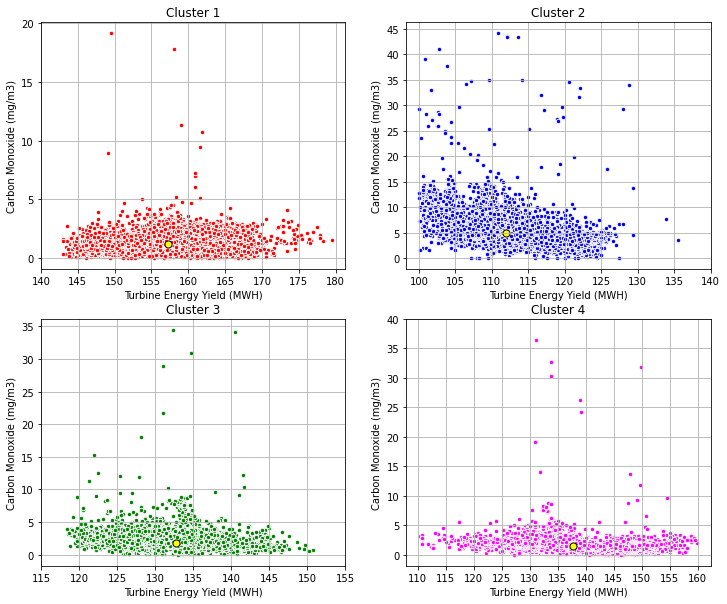

In [33]:
# Define subplot
fig6_1 = plt.figure(figsize=(12, 10))

# Cluster 1
ax1 = fig6_1.add_subplot(2, 2, 1)
ax1 = plt.scatter(X[y_kmeans == 0, -1], X[y_kmeans == 0, 8], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
# Cluster 1 centroid
ax1 = plt.scatter(kmeans.cluster_centers_[0, -1], kmeans.cluster_centers_[0, 8], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(140, 185, 5))
plt.yticks(np.arange(0, 25, 5))
# Plot title and labels
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Carbon Monoxide (mg/m3)')
plt.title('Cluster 1')
# Show grid
plt.grid()

# Cluster 2
ax2 = fig6_1.add_subplot(2, 2, 2)
ax2 = plt.scatter(X[y_kmeans == 1, -1], X[y_kmeans == 1, 8], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
# Cluster 2 centroid
ax2 = plt.scatter(kmeans.cluster_centers_[1, -1], kmeans.cluster_centers_[1, 8], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(100, 145, 5))
plt.yticks(np.arange(0, 50, 5))
# Plot title and labels
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Carbon Monoxide (mg/m3)')
plt.title('Cluster 2')
# Show grid
plt.grid()

# Cluster 3
ax3 = fig6_1.add_subplot(2, 2, 3)
ax3 = plt.scatter(X[y_kmeans == 2, -1], X[y_kmeans == 2, 8], s=20, c='green', 
            label='Cluster 4', edgecolor='whitesmoke')
# Cluster 3 centroid
ax3 = plt.scatter(kmeans.cluster_centers_[2, -1], kmeans.cluster_centers_[2, 8], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(115, 160, 5))
plt.yticks(np.arange(0, 40, 5))
# Plot title and labels
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Carbon Monoxide (mg/m3)')
plt.title('Cluster 3')
# Show grid
plt.grid()

# Cluster 4
ax4 = fig6_1.add_subplot(2, 2, 4)
ax4 = plt.scatter(X[y_kmeans == 3, -1], X[y_kmeans == 3, 8], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
# Cluster 4 centroid
ax4 = plt.scatter(kmeans.cluster_centers_[3, -1], kmeans.cluster_centers_[3, 8], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(110, 165, 5))
plt.yticks(np.arange(0, 45, 5))
# Plot title and labels
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Carbon Monoxide (mg/m3)')
plt.title('Cluster 4')
# Show grid
plt.grid()

# Show subplot
plt.show()

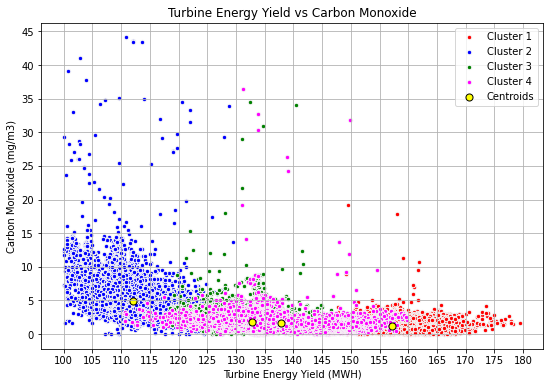

In [34]:
# Define figure
fig6_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig6_2 = plt.scatter(X[y_kmeans == 0, -1], X[y_kmeans == 0, 8], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
fig6_2 = plt.scatter(X[y_kmeans == 1, -1], X[y_kmeans == 1, 8], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
fig6_2 = plt.scatter(X[y_kmeans == 2, -1], X[y_kmeans == 2, 8], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
fig6_2 = plt.scatter(X[y_kmeans == 3, -1], X[y_kmeans == 3, 8], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
# Plot centroids
fig6_2 = plt.scatter(kmeans.cluster_centers_[:, -1], kmeans.cluster_centers_[:, 8], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust axes ranges
plt.xticks(np.arange(100, 185, 5))
plt.yticks(np.arange(0, 50, 5))
# Plot title and labels
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Carbon Monoxide (mg/m3)')
plt.title('Turbine Energy Yield vs Carbon Monoxide')
# Legend and grid
plt.legend()
plt.grid()

# Show plot
plt.show()

- **Cluster 1:** Lower CO levels, higher TEY
- **Cluster 2:** Higher CO levels, lower TEY
- **Cluster 3:** Moderate CO levels, slightly lower TEY
- **Cluster 4:** Moderate CO levels, slightly higher TEY

#### Turbine Energy Yield vs Nitrogen Oxides

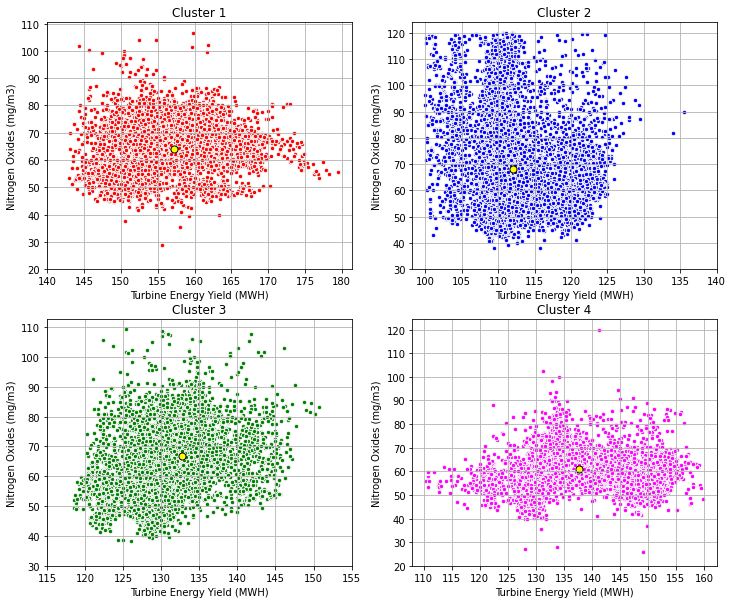

In [35]:
# Define subplot
fig7_1 = plt.figure(figsize=(12, 10))

# Cluster 1
ax1 = fig7_1.add_subplot(2, 2, 1)
ax1 = plt.scatter(X[y_kmeans == 0, -1], X[y_kmeans == 0, 9], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
# Cluster 1 centroid
ax1 = plt.scatter(kmeans.cluster_centers_[0, -1], kmeans.cluster_centers_[0, 9], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(140, 185, 5))
plt.yticks(np.arange(20, 120, 10))
# Plot title and labels
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Nitrogen Oxides (mg/m3)')
plt.title('Cluster 1')
# Show grid
plt.grid()

# Cluster 2
ax2 = fig7_1.add_subplot(2, 2, 2)
ax2 = plt.scatter(X[y_kmeans == 1, -1], X[y_kmeans == 1, 9], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
# Cluster 2 centroid
ax2 = plt.scatter(kmeans.cluster_centers_[1, -1], kmeans.cluster_centers_[1, 9], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(100, 145, 5))
plt.yticks(np.arange(30, 130, 10))
# Plot title and labels
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Nitrogen Oxides (mg/m3)')
plt.title('Cluster 2')
# Show grid
plt.grid()

# Cluster 3
ax3 = fig7_1.add_subplot(2, 2, 3)
ax3 = plt.scatter(X[y_kmeans == 2, -1], X[y_kmeans == 2, 9], s=20, c='green', 
            label='Cluster 4', edgecolor='whitesmoke')
# Cluster 3 centroid
ax3 = plt.scatter(kmeans.cluster_centers_[2, -1], kmeans.cluster_centers_[2, 9], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(115, 160, 5))
plt.yticks(np.arange(30, 120, 10))
# Plot title and labels
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Nitrogen Oxides (mg/m3)')
plt.title('Cluster 3')
# Show grid
plt.grid()

# Cluster 4
ax4 = fig7_1.add_subplot(2, 2, 4)
ax4 = plt.scatter(X[y_kmeans == 3, -1], X[y_kmeans == 3, 9], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
# Cluster 4 centroid
ax4 = plt.scatter(kmeans.cluster_centers_[3, -1], kmeans.cluster_centers_[3, 9], s=50,
            c='yellow', label='Centroids', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(110, 165, 5))
plt.yticks(np.arange(20, 130, 10))
# Plot title and labels
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Nitrogen Oxides (mg/m3)')
plt.title('Cluster 4')
# Show grid
plt.grid()

# Show subplot
plt.show()

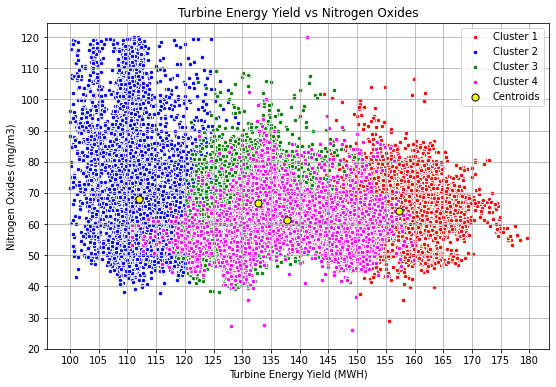

In [36]:
# Define figure
fig7_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig7_2 = plt.scatter(X[y_kmeans == 0, -1], X[y_kmeans == 0, 9], s=20, c='red', 
            label='Cluster 1', edgecolor='whitesmoke')
fig7_2 = plt.scatter(X[y_kmeans == 1, -1], X[y_kmeans == 1, 9], s=20, c='blue', 
            label='Cluster 2', edgecolor='whitesmoke')
fig7_2 = plt.scatter(X[y_kmeans == 2, -1], X[y_kmeans == 2, 9], s=20, c='green', 
            label='Cluster 3', edgecolor='whitesmoke')
fig7_2 = plt.scatter(X[y_kmeans == 3, -1], X[y_kmeans == 3, 9], s=20, c='magenta', 
            label='Cluster 4', edgecolor='whitesmoke')
# Plot centroids
fig7_2 = plt.scatter(kmeans.cluster_centers_[:, -1], kmeans.cluster_centers_[:, 9], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust axes ranges
plt.xticks(np.arange(100, 185, 5))
plt.yticks(np.arange(20, 130, 10))
# Plot title and labels
plt.xlabel('Turbine Energy Yield (MWH)')
plt.ylabel('Nitrogen Oxides (mg/m3)')
plt.title('Turbine Energy Yield vs Nitrogen Oxides')
# Legend and grid
plt.legend()
plt.grid()

# Show plot
plt.show()

- **Cluster 1:** Moderate NOx levels, slightly lower than Cluster 4, higher TEY
- **Cluster 2:** Moderate to high NOx levels, lower TEY
- **Cluster 3:** Moderate NOx levels (several higher-level outliers) with moderate TEY
- **Cluster 4:** Moderate NOx levels (a few higher-level outliers), slightly moderate TEY